In [1]:
%pip install python-resize-image

In [2]:
import wave
import gc
import librosa
import librosa.display
import IPython
import numpy as np
import tensorflow as tf
import pandas as pd
import sys
from PIL import Image # pip install Pillow
from PIL import ImageOps
from resizeimage import resizeimage
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# PATH_TO_DATASET = 'C:\\Users\\Interns\\Desktop\\Datasets\\ESC-50-master\\Sorted'
PATH_TO_DATASET = '/content/drive/MyDrive/FSD/ESC-50-master/Sorted'
PATH_TO_SPECTROGRAMS = '/content/drive/MyDrive/FSD/ESC-50-master/spectrograms'

In [5]:
df = pd.DataFrame()
files = []
labels = []
for folder in os.listdir(PATH_TO_DATASET):
    for file in os.listdir(str(os.path.join(PATH_TO_DATASET, str(folder)))):
        files.append(file.split('.')[0])
        labels.append(folder)
                
df['file'] = files   
df['label'] = labels
df

,file,label
0,5-251962-A-47,airplane
1,4-161099-B-47,airplane
2,5-251971-A-47,airplane
3,3-128512-A-47,airplane
4,5-251957-A-47,airplane
...,...,...
2000,2-106073-A-36,vacuum_cleaner
2001,4-181999-A-36,vacuum_cleaner
2002,5-188365-A-36,vacuum_cleaner
2003,5-182007-A-36,vacuum_cleaner


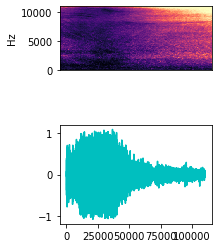

In [ ]:
###VISUALISING AUDIO FILE
y, sr = librosa.load('/content/drive/MyDrive/FSD/ESC-50-master/Sorted/airplane/1-11687-A-47.wav')
plt.figure()
plt.subplot(3, 2, 1)
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
spectrogram = librosa.feature.melspectrogram(S = spectrogram**2)
#### used to display audio file and specto plot
librosa.display.specshow(spectrogram, y_axis='linear')
signal = plt.subplot(2, 2, 3)
signal.plot(y, color="c")

In [24]:
# Creating the classes directories from Class0 to Class9
specdirectory = "/content/drive/MyDrive/FSD/spectrograms_32_128/"

labels = set(df['label'].tolist())
for label in labels:
    Path(specdirectory + str(label)).mkdir(parents=True, exist_ok=True)   

In [25]:
SAMPLING_RATE = 16000

In [26]:
def genspectrograms(row):
    spect_directory = "class_" + str(row["label"])
    y, sr = librosa.load('/content/drive/MyDrive/FSD/ESC-50-master/Sorted' + "/" + str(row["label"]) + "/" + row["file"] + ".wav", sr=SAMPLING_RATE)
    y=librosa.util.normalize(y)
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y, int((SAMPLING_RATE)/(1/0.64)))), ref=np.max)
    dur = librosa.get_duration(y)
    ## for chroma mfcc and use 
    ## librosa.feature.mfcc(y=y, sr=sr)
    ## librosa.feature.chroma_stft
    spectrogram = librosa.feature.melspectrogram(n_mels=128, S = spectrogram**2, window=(SAMPLING_RATE)/(1/0.025), hop_length=(SAMPLING_RATE)/(1/0.01)).T
    librosa.display.specshow(spectrogram)
    librosa.display.specshow(spectrogram)
  
    specdirectory =  f"/content/drive/MyDrive/FSD/spectrograms_32_128/{row['label']}/{row['file']}.npy"
    np.save(specdirectory, spectrogram)
    plt.clf()
    plt.close('all')
    gc.collect()

In [13]:
#configs
tqdm.pandas()

In [ ]:
df.progress_apply(genspectrograms, axis=1)

 12%|█▏        | 246/2005 [04:09<30:01,  1.02s/it]